<a href="https://colab.research.google.com/github/agatiks/Methods-of-optimization/blob/main/lab4_PythonMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Лабораторная работа №4. Использование готовых библиотек для оптимизации на Python.**

---

## ***Импорты и константы***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy.linalg as ln
import scipy as sp
import scipy.optimize as opt
import torch
import random as rnd

SPACE = np.linspace(-10, 10, 30)
EPS = 1E-5

## ***Графики***

In [ ]:
def gr_grad(fun, x, y, u, v, space = SPACE):
  start_params = plt.rcParams["figure.figsize"]
  plt.rcParams["figure.figsize"] = (20,10)
  x_grid, y_grid = np.meshgrid(space, space)
  v_grid = np.array([x_grid, y_grid])
  ax = plt.figure().add_subplot()
  ax.contour(x_grid, y_grid, fun(v_grid), 1000)
  ax.quiver(x, y, u, v, scale = 1)
  plt.show()
  plt.rcParams["figure.figsize"] = start_params

## ***Функции***

In [ ]:
rosenbroke = lambda x: (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
rosenbroke_grad = lambda x: np.array([-400*x[0]*(x[1] - np.power(x[0], 2)) + 2 * x[0] - 2, -200*(np.power(x[0], 2)) + 200 * x[1]])
points = [1., 1.]
points1 = np.array([[1.0,  0.0], [1.0, 2.0, 3.0, 1.0, 1.5]])
quad = lambda x: x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20
quad_grad = lambda x: np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


## ***4. 1. PyTorch для подсчёта градиента.***

In [ ]:
from torch.autograd.functional import jacobian
from torch.autograd.functional import hessian

In [ ]:
def eps_grad(func, x):
  gradient = []
  delta_x = x.copy()
  for i in range(len(x)):
    delta_x[i] = x[i] + EPS
    gradient.append((func(delta_x) - func(x))/EPS)
    delta_x[i] = x[i]
  return np.array(gradient)

In [ ]:
def compare_grads(func, grad, points = points):
  expected = grad(points)
  with_eps = eps_grad(func, points)
  autograd = jacobian(func, torch.tensor(points))

  print("Expected: ", expected)
  print("In a neigbourhood of a point: ", with_eps)
  print("Autograd: ", autograd)

In [ ]:
compare_grads(rosenbroke, rosenbroke_grad)

Expected:  [0. 0.]
In a neigbourhood of a point:  [0.00401004 0.001     ]
Autograd:  tensor([0., 0.])


In [ ]:
#compare_grads(rosenbroke, rosenbroke_grad, points1)

In [ ]:
compare_grads(quad, quad_grad)

Expected:  [10. -5.]
In a neigbourhood of a point:  [10.00001 -4.99999]
Autograd:  tensor([10., -5.])


## ***4. 2. SGD в PyTorch.***

In [ ]:
from torch.optim import SGD
import numpy as np
import torch.nn as nn
import torch

EPS = 1E-6
EPS

1e-06

In [ ]:
from torch.autograd import Variable
import torch.optim as optim

def count_res_for_optimizer(model, t, x, optimizer):
  loss_fn = nn.MSELoss()
  iter=2000
  error=2000
  for i in range(0, iter):
    optimizer.zero_grad()
    predictions = model(x)
    loss = loss_fn(predictions, t)
    loss.backward()
    optimizer.step()
    new_error=loss.data
    if(error < 10 or abs(error - new_error) < EPS):
      print("Number of iterations:", i)
      break
    if i == 1999:
      print("Number of iterations:", i)
    error=new_error
  print("error = {}".format(loss.data))	

lr_sgd_and_momentum_and_nesterov = 0.000001
lr_adagrad_rms_adam = 1.5

A = 5
b = 0
error = 5
N = 100 # number of data points

# Data
X = Variable(torch.randn(N, 1))

# (noisy) Target values that we want to learn.
t = A * X + b + Variable(torch.randn(N, 1) * error)

model = nn.Linear(1, 1)
print("SGD")
model = nn.Linear(1, 1)
count_res_for_optimizer(model, t, X, optim.SGD(model.parameters(), lr_sgd_and_momentum_and_nesterov))
print("Momentum")
model = nn.Linear(1, 1)
count_res_for_optimizer(model, t, X, optim.SGD(model.parameters(), lr_sgd_and_momentum_and_nesterov, momentum = 0.8))
print("Nesterov")
model = nn.Linear(1, 1)
count_res_for_optimizer(model, t, X, optim.SGD(model.parameters(), lr_sgd_and_momentum_and_nesterov, momentum = 0.8, nesterov=True))
print("Adagrad")
model = nn.Linear(1, 1)
count_res_for_optimizer(model , t, X, optim.Adagrad(model.parameters(), lr_adagrad_rms_adam))
print("RMSprop")
model = nn.Linear(1, 1)
count_res_for_optimizer(model , t, X, optim.RMSprop(model.parameters(), lr_adagrad_rms_adam, momentum=0.8))
print("Adam")
model = nn.Linear(1, 1)
count_res_for_optimizer(model , t, X, optim.Adam(model.parameters(), lr_adagrad_rms_adam, amsgrad=False))

SGD
Number of iterations: 1999
error = 86.48694610595703
Momentum
Number of iterations: 1999
error = 70.95463562011719
Nesterov
Number of iterations: 1999
error = 72.58991241455078
Adagrad
Number of iterations: 49
error = 31.747787475585938
RMSprop
Number of iterations: 74
error = 31.747812271118164
Adam
Number of iterations: 129
error = 31.747787475585938


Теперь запустим наши методы из 2-ой лабороторной на тех же данных и с теми же параметрами:


In [ ]:
def MSE(true_points, coeffs):
  sum = 0
  a = coeffs[0]
  b = coeffs[1]
  for point in true_points:
    sum += pow((point[1] - (point[0] * a + b)), 2) 
  return sum 

# её градиент
def grad_MSE(points, coeffs, batch_size):
  sum_a = 0
  sum_b = 0
  dataset_size = len(points)
  if batch_size == dataset_size:
    for i in range(batch_size):
      x_i = points[i][0]
      y_i = points[i][1]
      sum_a += -2 * x_i * (y_i - (coeffs[0] * x_i + coeffs[1]))
      sum_b += -2 * (y_i - (coeffs[0] * x_i + coeffs[1]))
  else:
    j = 0
    while j < batch_size:
      i = random.randint(0, dataset_size - 1)
      x_i = points[i][0]
      y_i = points[i][1]
      sum_a += -2 * x_i * (y_i - (coeffs[0] * x_i + coeffs[1]))
      sum_b += -2 * (y_i - (coeffs[0] * x_i + coeffs[1]))
      j += 1
    
  return np.array([sum_a , sum_b])

points_before_prepare = X

In [ ]:
points = []
j = 0
for i in points_before_prepare:
  points.append(np.array([j, i[0]]))
  j += 1

In [ ]:
import random
print("SGD:\n")
def shocasticGD(batch_size, points, start_coeffs, lr=lr_sgd_and_momentum_and_nesterov, epoch = 300, diff=False):
    i = 0
    coeffs = start_coeffs
    prev_coeffs = start_coeffs + 0.1
    print(MSE(points, coeffs), "<- start MSE")
    diffs=[]
    while i == 0 or i < epoch and abs(MSE(points, prev_coeffs) - MSE(points, coeffs)) > EPS and abs(prev_coeffs[0] - coeffs[0]) > EPS and abs(prev_coeffs[1] - coeffs[1]) > EPS :
      prev_coeffs = coeffs
      coeffs = coeffs - lr * grad_MSE(points, prev_coeffs, batch_size)
      random.shuffle(points)
      #print("for i = ", i, "coeffs:", coeffs, "prev:", prev_coeffs)
      i += 1
      diffs.append(coeffs)
    
    print(MSE(points, coeffs), "<- min MSE")
    print("cnt epoches = ", i)
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs
res_coeffs = shocasticGD(len(points), points, np.array([0.1, 0.1]))


SGD:

3533.578948138412 <- start MSE
145.24427579997786 <- min MSE
cnt epoches =  12


In [ ]:
print("Momentum:\n")

def shocasticGDmomentum(batch_size, points, start_coeffs, lr=lr_sgd_and_momentum_and_nesterov, epoch = 100, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    td_prev=coeffs
    beta = 0.8
    diffs = []
    prev_coeffs = coeffs + 0.1
    while i < epoch:
      prev_coeffs = coeffs
      td = beta * td_prev + lr * grad_MSE(points, prev_coeffs, batch_size)
      td_prev = td
      coeffs -= td
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

res_coeffs = shocasticGDmomentum(len(points), points, np.array([0.1, 0.1]))

Momentum:

3533.578948138412 <- start MSE
144.39115616670895 <- min MSE


In [ ]:
print("Nesterov:\n")

def shocasticGDnesterov(batch_size, points, start_coeffs, lr=lr_sgd_and_momentum_and_nesterov, epoch = 300, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    td_prev=coeffs
    beta = 0.8
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      for j in points:
        j -= beta * td_prev
      td = beta * td_prev + lr * grad_MSE(points, prev_coeffs, batch_size)
      td_prev = td
      coeffs -= td
      diffs.append(coeffs)
      random.shuffle(points)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

res_coeffs = shocasticGDnesterov(len(points), points, np.array([0.1, 0.1]))

Nesterov:

3533.578948138413 <- start MSE
145.2341273665999 <- min MSE


In [ ]:
print("Adagrad:\n")
def shocasticGDAdaGrad(batch_size, points, start_coeffs, lr=lr_adagrad_rms_adam, epoch = 100, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    sum_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      sum = sum_prev + np.square(grad_MSE(points, prev_coeffs, batch_size))
      sum_prev = sum
      coeffs -= lr * np.divide(grad_MSE(points, prev_coeffs, batch_size), np.sqrt(sum))
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs
res_coeffs = shocasticGDAdaGrad(len(points), points, np.array([0.1, 0.1]))

Adagrad:

3950.903875984316 <- start MSE
146.43927582813347 <- min MSE


In [ ]:
print("RMS:")
def shocasticGDRMS(batch_size, points, start_coeffs, lr=lr_adagrad_rms_adam, epoch = 300, diff=False):
    i = 0
    gamma = 0.9
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    V_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      V = gamma * V_prev + (1 - gamma) * np.square(grad_MSE(points, prev_coeffs, batch_size))
      sum_prev = sum
      coeffs -= lr * np.divide(grad_MSE(points, prev_coeffs, batch_size), np.sqrt(V))
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

res_coeffs = shocasticGDRMS(len(points), points, np.array([0.001, 0.01]))

RMS:
169.84546398403697 <- start MSE
170.21304634206805 <- min MSE


In [ ]:
print("Adam:\n")
def shocasticAdam(batch_size, points, start_coeffs, lr=lr_adagrad_rms_adam, epoch = 300, diff=False):
    i = 0
    gamma = 0.9
    coeffs = start_coeffs
    td_prev = start_coeffs
    beta = 0.8
    print(MSE(points, coeffs), "<- start MSE")
    V_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      td = beta * td_prev + (1 - beta) * grad_MSE(points, prev_coeffs, batch_size)
      V = gamma * V_prev + (1 - gamma) * np.square(grad_MSE(points, prev_coeffs, batch_size))
      coeffs -= lr * np.divide(td, np.sqrt(V) + 1E-8)
      random.shuffle(points)
      i += 1
      diffs.append(coeffs)
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

res_coeffs = shocasticAdam(len(points) , points, np.array([0.1, 0.1]))

Adam:

3950.903875984315 <- start MSE
3959.3558466396144 <- min MSE


## ***4. 3. Готовые методы оптимизации в SciPy.***

In [ ]:
start_point = [5, 6]
res = []
def hess(func):
  def inner_hess(x):
    return hessian(func, torch.tensor(x))
  return inner_hess
def jac(func):
  def inner_jac(x):
    print(x.reshape(1))
    return jacobian(func, torch.tensor(x.reshape(1)))
  return inner_jac

In [ ]:
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
x0 = [5, 6]
res = minimize(rosen, x0, method='dogleg', jac = rosen_der, hess = rosen_hess)
res.x

array([1.00000001, 1.00000001])

In [ ]:
opt.least_squares(rosenbroke, start_point)

 active_mask: array([0., 0.])
        cost: 83.34502809651626
         fun: array([12.91085033])
        grad: array([-9.020423, 16.151447])
         jac: array([[-0.69866994,  1.25099793]])
     message: 'The maximum number of function evaluations is exceeded.'
        nfev: 200
        njev: 148
  optimality: 16.15144699794802
      status: 0
     success: False
           x: array([-2.59262271,  6.72794743])

##Пункт (с)


In [ ]:
from math import sin
EPS=-1E9
def f(x):
  return sin(x[0]) * (1 + x[1] + x[2]**2 + x[3]**3)

ar = []
for i in range(4):
    ar.append(np.random.rand() * 100)
    
res = minimize(f, ar, method="L-BFGS-B")
print(res)

bounds = [(EPS, -EPS) for _ in range(4)]
bounds[0] = (0, np.pi)
print('\n\nТеперь установим bounds:')
res = minimize(f, ar, method="L-BFGS-B", bounds=bounds)
print(res)

      fun: -6.1627939159409845e+29
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 170
      nit: 15
   status: 0
  success: True
        x: array([2.66882825e+14, 7.93482192e+01, 7.01745063e+02, 9.45319526e+09])


Теперь установим bounds:
      fun: 6.087257191224656e-11
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.97062268e+05,  1.21492152e-16,  2.01948392e-14,  2.28405376e-12])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 0
   status: 0
  success: True
        x: array([ 3.14159265, 75.58852254, 82.45323059, 78.84738722])


вывод: если мы знаем область определения функции, то можем указать bounds, чтобы алгоритм за них вдруг не вышел и не ушёл куда-то далеко..

## ***4. 4. Линейные и нелинейные ограничения в методах оптимизации.***

Условная оптимизация method="trust-constr"

Реализация метода trust-constr основана на EQSQP для задач с ограничениями вида равенства и на TRIP для задач с ограничениями в виде неравенств. Оба метода реализованы алгоритмами поиска локального минимума в доверительной области и хорошо подходят для крупномасштабных задач.

Рассмотрим извествную функцию розенброка от 2ух переменных
При этом заданы след. ограничения на её область определения:

(1) x[0] ^ 2 + x[1] <= 1
(2) x[0] ^ 2 - x[1] <= 1
(3) 2 * x[0] + x[1] = 1
(4) x[0] + 2 * x[1] <= 1
(5) 0 <= x0 <= 1
(6) -0,5 <= x1 <= 2

В нашем случае имеется единственное решение в точке $[x_0, x_1] = [0.4149, 0.1701]$, для которой справедливы только первое и четвертое ограничения.

(5) и (6) можем записать через bounds
(3) и (4) через линейные ограничения
оставшиеся 2 - через нелинейные 

In [ ]:
import numpy as np
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint ([[1, 2], [2, 1]], [-np.inf, 1], [1, 1])

from scipy.optimize import NonlinearConstraint

def cons_f(x):
     return [x[0]**2 + x[1], x[0]**2 - x[1]]

def cons_J(x):
     return [[2*x[0], 1], [2*x[0], -1]]

def cons_H(x, v):
     return v[0]*np.array([[2, 0], [0, 0]]) + v[1]*np.array([[2, 0], [0, 0]])

nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 1, jac=cons_J, hess=cons_H)

from scipy.optimize import minimize
from scipy.optimize import rosen, rosen_der, rosen_hess, rosen_hess_prod
from scipy.optimize import Bounds

bounds = Bounds ([0, -0.5], [1.0, 2.0])
x0 = np.array([0.5, 0])
res = minimize(rosen, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess,
                constraints=[linear_constraint, nonlinear_constraint],
                options={'verbose': 1}, bounds=bounds)
print(res.x)

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 8, CG iterations: 7, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.067 s.
[0.41494531 0.17010937]


черновики:

In [ ]:
rosenbroke = lambda x: (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
points = [[1.0, 2.0, 3.0, 0.0, 1.5], [1.0, 2.0, 3.0, 1.0, 1.5]]
s = len(points[0])
#x = torch.tensor(points, requires_grad=True)
xs = []
ys = []
us = []
vs = []

for i in range(s):
  xs.append(points[0][i])
  ys.append(points[1][i])
  x = torch.tensor([points[0][i], points[1][i]], requires_grad=True)
  y = rosenbroke(x)
  print(y.grad_fn)
  y.backward()
  g = x.grad
  us.append(g[0])
  vs.append(g[1])
print(xs, ys, us, vs)
#y = rosenbroke(x)


[1.0, 2.0, 3.0, 0.0, 1.5] [1.0, 2.0, 3.0, 1.0, 1.5] [tensor(0.), tensor(1602.), tensor(7204.), tensor(-2.), tensor(451.)] [tensor(0.), tensor(-400.), tensor(-1200.), tensor(200.), tensor(-150.)]


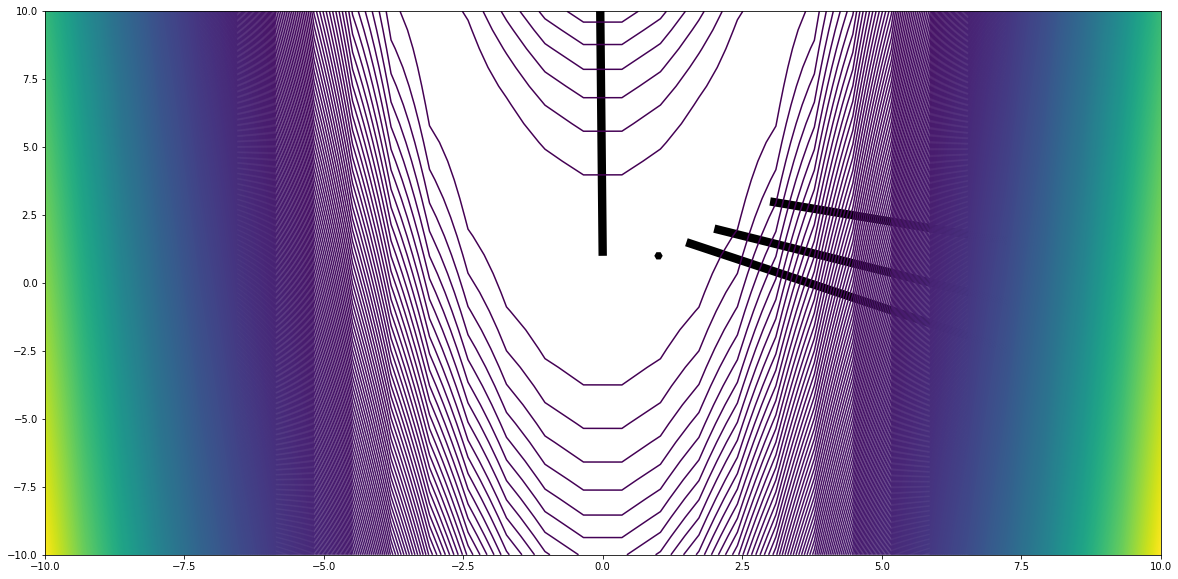

In [ ]:
gr_grad(rosenbroke, xs, ys, us, vs)